In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('/mnt/sagarika/0segmentation/Telco_customer_churn.xlsx')

In [3]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
df = df[df['Total Charges'] != " "].reset_index(drop=True)
df['Total Charges'] = df['Total Charges'].astype(float)

In [6]:
continuous_variables = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']
categorical_variables = ['Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Reason']

In [7]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,NaN
7028,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140,NaN
7029,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,NaN
7030,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [8]:
df['CustomerID'].nunique()

7032

In [9]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5163
dtype: int64

In [10]:
df['Internet Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [11]:
df['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   int64  
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Service   7032 

In [13]:
for col in df.columns:
    print(col, df[col].nunique())

CustomerID 7032
Count 1
Country 1
State 1
City 1129
Zip Code 1652
Lat Long 1652
Latitude 1652
Longitude 1651
Gender 2
Senior Citizen 2
Partner 2
Dependents 2
Tenure Months 72
Phone Service 2
Multiple Lines 3
Internet Service 3
Online Security 3
Online Backup 3
Device Protection 3
Tech Support 3
Streaming TV 3
Streaming Movies 3
Contract 3
Paperless Billing 2
Payment Method 4
Monthly Charges 1584
Total Charges 6530
Churn Label 2
Churn Value 2
Churn Score 85
CLTV 3435
Churn Reason 20


In [14]:
grouped = df.groupby(df['Churn Reason']).size().reset_index(name='Count')

# Sort the grouped data by the 'Count' column
sorted_grouped = grouped.sort_values(by='Count', ascending=False)

print(sorted_grouped)


                                 Churn Reason  Count
1                  Attitude of support person    192
4   Competitor offered higher download speeds    189
5                Competitor offered more data    162
7                                  Don't know    154
3                Competitor made better offer    140
0                Attitude of service provider    135
2               Competitor had better devices    130
14                        Network reliability    103
18                    Product dissatisfaction    102
17                             Price too high     98
19                    Service dissatisfaction     89
10            Lack of self-service on Website     88
8                          Extra data charges     57
13                                      Moved     53
11                  Limited range of services     44
12                      Long distance charges     44
9    Lack of affordable download/upload speed     44
16            Poor expertise of phone support 

In [15]:
df['Payment Method'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

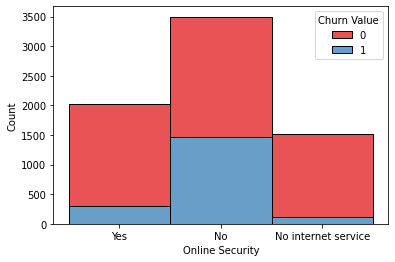

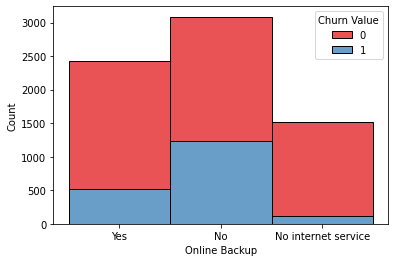

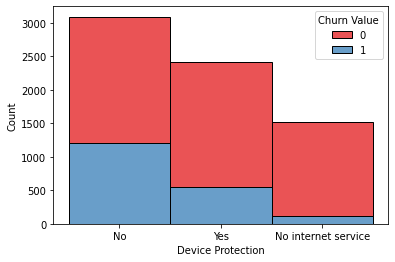

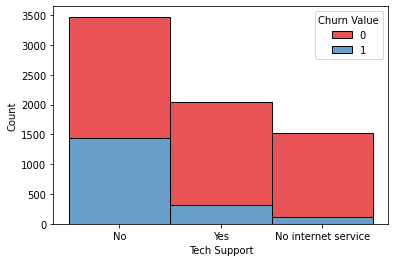

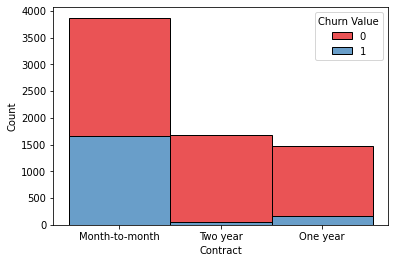

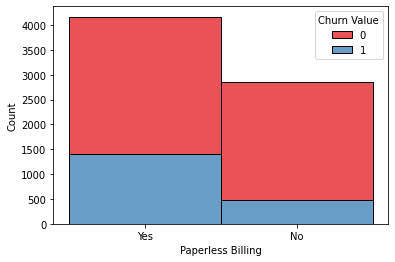

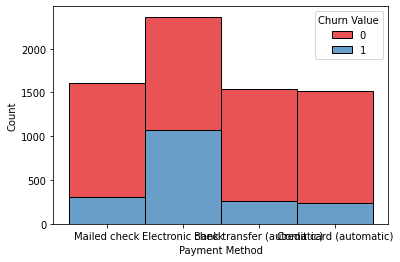

In [16]:
cols = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Contract', 'Paperless Billing', 'Payment Method']

for col in cols:
    sns.histplot(df, x=col, hue='Churn Value', multiple='stack', palette='Set1')
    plt.show()

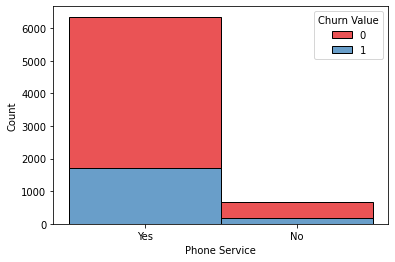

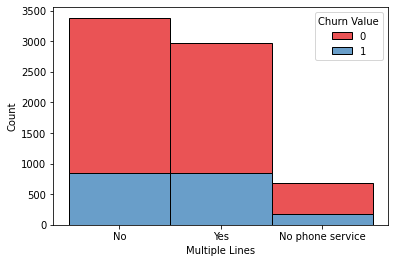

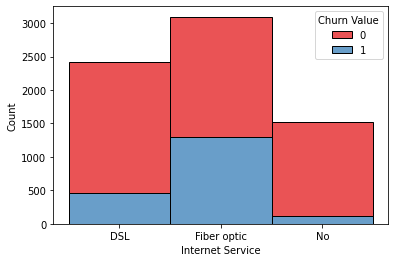

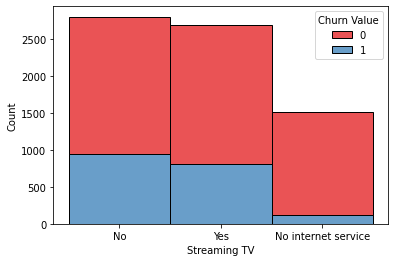

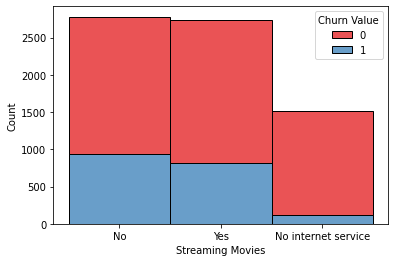

In [17]:
cols = ['Phone Service', 'Multiple Lines', 'Internet Service' , 'Streaming TV', 'Streaming Movies']

for col in cols:
    sns.histplot(df, x=col, hue='Churn Value', multiple='stack', palette='Set1')
    plt.show()

In [18]:
continuous_variables

['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

In [19]:
corr = df[continuous_variables + ['Churn Value']]
corr = corr.corr()
corr

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV,Churn Value
Tenure Months,1.000000,0.246862,0.825880,-0.226379,0.396188,-0.354049
Monthly Charges,0.246862,1.000000,0.651065,0.133556,0.098565,0.192858
Total Charges,0.825880,0.651065,1.000000,-0.124312,0.341837,-0.199484
Churn Score,-0.226379,0.133556,-0.124312,1.000000,-0.080837,0.664970
CLTV,0.396188,0.098565,0.341837,-0.080837,1.000000,-0.128253
Churn Value,-0.354049,0.192858,-0.199484,0.664970,-0.128253,1.000000


In [20]:
df['Churn Value'].value_counts()

0    5163
1    1869
Name: Churn Value, dtype: int64

In [21]:
enc = LabelEncoder()
df['Contract'] = enc.fit_transform(df['Contract'])
print(enc.classes_)

df['Internet Service'] = enc.fit_transform(df['Internet Service'])
print(enc.classes_)

df['Multiple Lines'] = enc.fit_transform(df['Multiple Lines'])
print(enc.classes_)

df['Payment Method'] = enc.fit_transform(df['Payment Method'])
print(enc.classes_)

df['Tech Support'] = enc.fit_transform(df['Tech Support'])
print(enc.classes_)

['Month-to-month' 'One year' 'Two year']
['DSL' 'Fiber optic' 'No']
['No' 'No phone service' 'Yes']
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
['No' 'No internet service' 'Yes']


In [22]:
df_no = df[df['Churn Value'] == 0].sample(n = 1869, random_state=42).reset_index(drop=True)
df_no_val = df[df['CustomerID'].isin(df_no['CustomerID']) == False].reset_index(drop=True)

df_yes = df[df['Churn Value'] == 1].reset_index(drop=True)

In [23]:
df = pd.concat([df_no, df_yes], axis = 0).reset_index(drop=True)

In [24]:
df = df[['Tenure Months', 'Tech Support', 'Internet Service', 'Payment Method', 'Contract', 'Total Charges',  'Churn Value']] #
df_no_val = df_no_val[['Tenure Months', 'Tech Support', 'Internet Service', 'Payment Method', 'Contract', 'Total Charges',  'Churn Value']] #'Tenure Months', 'Tech Support', 'Internet Service', 'Payment Method', 'Contract', 'Total Charges', 
y_no_val = df_no_val['Churn Value']
X_no_val = df_no_val.drop('Churn Value', axis=1)

In [25]:
y = df['Churn Value']
X = df.drop('Churn Value', axis=1)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, random_state=42, stratify=y)

In [27]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

In [28]:
y_val

0      0
1      1
2      1
3      1
4      1
      ..
930    0
931    0
932    0
933    0
934    0
Name: Churn Value, Length: 935, dtype: int64

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Example
clf = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=3)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, n_estimators=500)

In [30]:
preds = clf.predict(X_val)

In [31]:
y_val

0      0
1      1
2      1
3      1
4      1
      ..
930    0
931    0
932    0
933    0
934    0
Name: Churn Value, Length: 935, dtype: int64

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, preds)

0.7486631016042781

In [33]:
report = classification_report(y_val, preds)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.66      0.72       468
           1       0.71      0.84      0.77       467

    accuracy                           0.75       935
   macro avg       0.76      0.75      0.75       935
weighted avg       0.76      0.75      0.75       935



In [34]:
preds = clf.predict(X_no_val)

In [35]:
print(accuracy_score(y_no_val, preds))
print(classification_report(y_no_val, preds))

0.7361998837884951
              precision    recall  f1-score   support

           0       0.89      0.67      0.77      3294
           1       0.60      0.85      0.70      1869

    accuracy                           0.74      5163
   macro avg       0.74      0.76      0.73      5163
weighted avg       0.78      0.74      0.74      5163



In [36]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


train_pool = Pool(X_train, y_train, cat_features=['Internet Service', 'Tech Support', 'Payment Method', 'Contract']) #, cat_features=['Internet Service', 'Tech Support', 'Payment Method', 'Contract']
val_pool = Pool(X_val, y_val, cat_features=['Internet Service', 'Tech Support', 'Payment Method', 'Contract']) #, cat_features=['Internet Service', 'Tech Support', 'Payment Method', 'Contract']

# Initialize and train the CatBoost model
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
model.fit(train_pool)

# Make predictions
y_pred = model.predict(val_pool)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

0:	learn: 0.6554011	total: 66.5ms	remaining: 1m 6s
100:	learn: 0.4492920	total: 650ms	remaining: 5.78s
200:	learn: 0.4058972	total: 1.29s	remaining: 5.12s
300:	learn: 0.3706771	total: 1.94s	remaining: 4.5s
400:	learn: 0.3436515	total: 2.81s	remaining: 4.2s
500:	learn: 0.3195197	total: 3.47s	remaining: 3.45s
600:	learn: 0.2977164	total: 4.2s	remaining: 2.79s
700:	learn: 0.2792360	total: 5s	remaining: 2.13s
800:	learn: 0.2646302	total: 5.82s	remaining: 1.45s
900:	learn: 0.2514503	total: 6.64s	remaining: 730ms
999:	learn: 0.2387572	total: 7.67s	remaining: 0us
Accuracy: 0.758288770053476
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       468
           1       0.73      0.83      0.77       467

    accuracy                           0.76       935
   macro avg       0.76      0.76      0.76       935
weighted avg       0.76      0.76      0.76       935

